In [ ]:
import numpy as np
data=[1,2,2,2,3,1,1,15,2,2,2,3,1,1,2]
mean=np.mean(data)
std=np.std(data)
print("Mean of data is",mean)
print("Standard deviation is",std)
threshold=3
outlier=[]
for i in data:
  z=(i-mean)/std
  if z>threshold:
    outlier.append(i)
print("Outlier dataset is",outlier)

Mean of data is 2.6666666666666665
Standard deviation is 3.3598941782277745
Outlier dataset is [15]


# Interquartile Range to detect outliers in Data

q1 represents 25th percentile of the data


q2 represents 50th percentile of the data

q3 represents 75th percentile of the data

If a dataset has 2n/2n+1 data points, then

Q1=median of the dataset

Q2=median of n smallest datapoints

Q3=median of n highest data points

IQR is the range between the first and the third quartile namely Q1 and Q3
### IQR=Q3-Q1

In [ ]:
#step 1: import necessary liberaries
import seaborn as sns
#step 2 : Take data and sort in ascending order
data=[10,15,18,19,7,10,25,22,50,80,88]
sort_data=np.sort(data)
sort_data


array([ 7, 10, 10, 15, 18, 19, 22, 25, 50, 80, 88])

In [ ]:
#step 3: Claculate Q1,Q2,Q#
Q1=np.percentile(data,25,interpolation='midpoint')
Q2=np.percentile(data,50,interpolation='midpoint')
Q3=np.percentile(data,75,interpolation='midpoint')

print("Q1 25 percentile of the given data is",Q1)
print("Q2 50 percentile of the given data is",Q2)
print("Q3 75 percentile of the given data is",Q3)

IQR=Q3-Q1
print("Interquartile range is ",IQR)

Q1 25 percentile of the given data is 12.5
Q2 50 percentile of the given data is 19.0
Q3 75 percentile of the given data is 37.5
Interquartile range is  25.0


In [ ]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit is",low_lim)
print("Upper limit is",up_lim)

Lower limit is -25.0
Upper limit is 75.0


In [ ]:
#Step 5:Data points greater than upperlimit or less than the lower limit
outlier=[]
for x in data:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)
print("Outlier in the dataset is",outlier)

Outlier in the dataset is [80, 88]


<Axes: >

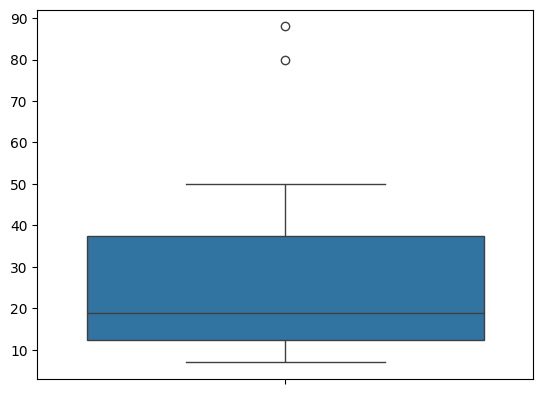

In [ ]:
#Step 6: Plot the bod plot to highlight outliers
sns.boxplot(data)

In [ ]:
import pandas as pd
def load_data():
  df_all=pd.read_csv('train.csv')
  #take a subset
  return df_all.loc[:300,['Survived','Pclass','Sex','Cabin','Embarked']]
#load the subset
df=load_data()

# Finding duplicate rows

In [ ]:
#For single column
df.Cabin.duplicated()

0      False
1      False
2      False
3       True
4       True
       ...  
296     True
297     True
298     True
299    False
300    False
Name: Cabin, Length: 301, dtype: bool

In [ ]:
#To consider certain columns for identifying duplicates
df.duplicated(subset=['Survived','Pclass','Sex'])

0      False
1      False
2      False
3      False
4      False
       ...  
296     True
297     True
298     True
299     True
300     True
Length: 301, dtype: bool

In [ ]:
df.Cabin.duplicated().sum()

230

In [ ]:
df.duplicated().sum()

199

In [ ]:
#keep defaults first
df.loc[df.duplicated(keep='first'),:]

,Survived,Pclass,Sex,Cabin,Embarked
5,1,2,female,NaN,S
6,0,3,male,NaN,S
7,0,2,male,NaN,S
11,0,3,male,NaN,S
12,0,3,male,NaN,S
...,...,...,...,...,...
294,0,2,female,NaN,S
295,1,3,female,NaN,C
296,1,3,female,NaN,S
297,0,3,male,NaN,S


In [ ]:
#There is a third option we can use keep=false